In [1]:
import leabra7.net
import matplotlib
import torch

import pandas as pd

import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

In [2]:
# Create the network
net = leabra7.net.Net()

# Set options for our layers
spec = leabra7.specs.LayerSpec(
    # For each layer, log the unit potential
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net",
                  "unit_net", "unit_gc_i", "unit_adapt",
                  "unit_spike")
)

proSpec = leabra7.specs.ProjnSpec(dist = leabra7.rand.Gaussian(mean = 0.0, var = 0.5))

# Create our layers and projections
net.new_layer("input", 1, spec)
net.new_layer("middle", 3, spec)
net.new_layer("output", 5, spec)
net.new_projn("proj1", "input", "middle", spec = proSpec)
net.new_projn("proj2", "middle", "output", spec = proSpec)
net.new_projn("proj3", "input", "output", spec = proSpec)

# Run 200 cycles
for i in range(100):
    # Force the input unit activation to be 1
    net.force_layer(name = "input", acts = torch.ones([1,]))
    net.cycle()

wholeLog_in, partLog_in = net.logs(freq="cycle", name="input")
wholeLog_mid, partLog_mid = net.logs(freq="cycle", name="middle")
wholeLog_out, partLog_out = net.logs(freq="cycle", name="output")

In [3]:
# Function to plot data for a certain attribute for each unit of layer
def plotByUnit(axes: List[matplotlib.axes.Axes], log: pd.DataFrame, attr: str, title: str, location: List):
    for name, group in log.groupby('unit'):
        group.plot(x=group['time'], y=attr, ax=axes[location], title = title, label="unit " +str(name))

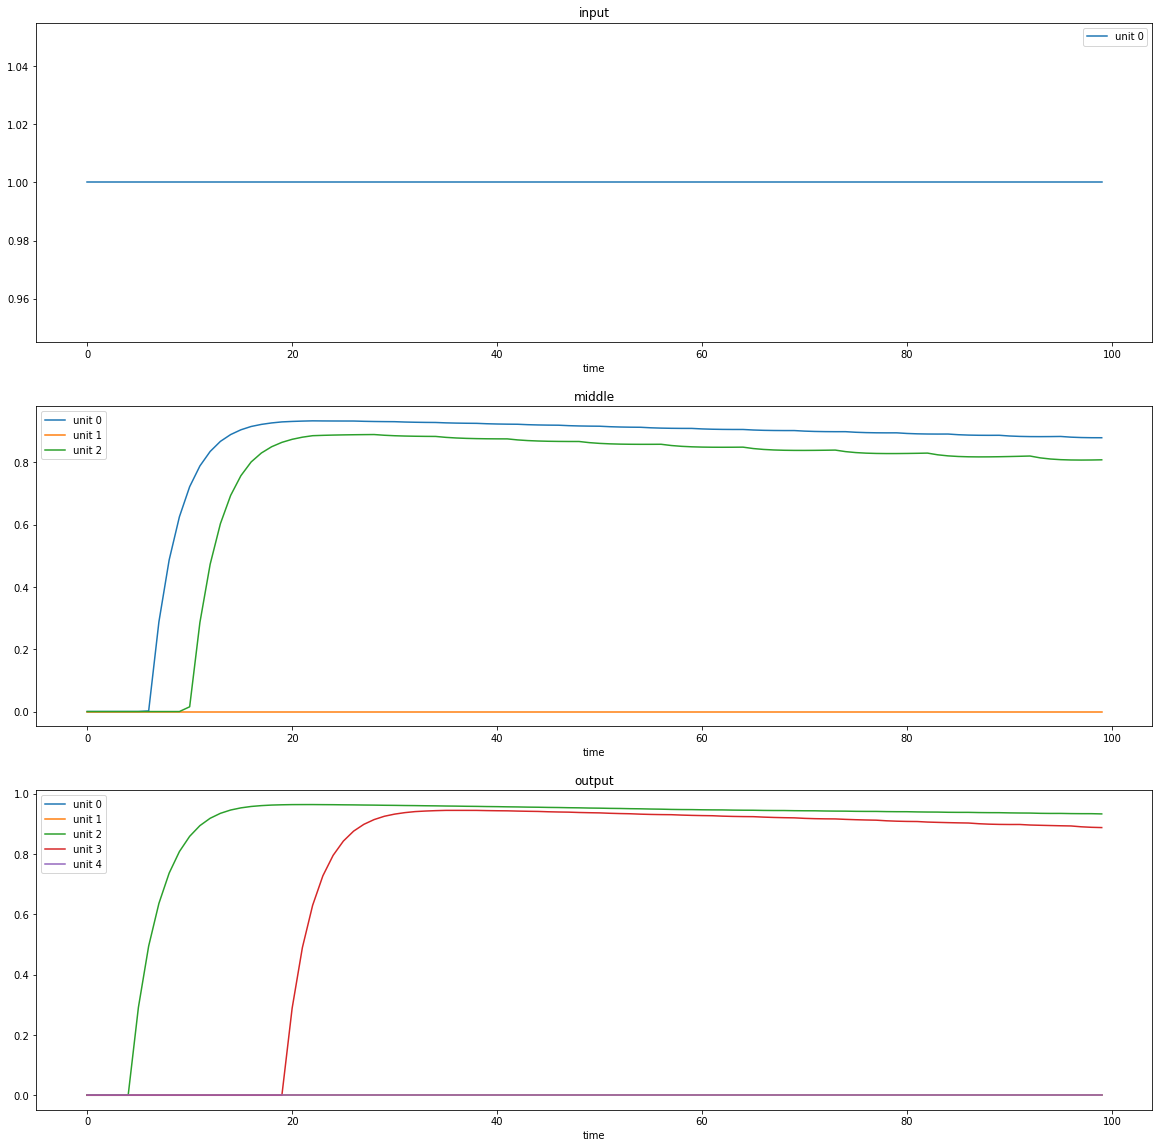

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
attr = 'act'
plotByUnit(axes = ax, log = partLog_in, attr = attr, title = "input", location = 0)
plotByUnit(axes = ax, log = partLog_mid, attr = attr, title = "middle", location = 1)
plotByUnit(axes = ax, log = partLog_out, attr = attr, title = "output", location = 2)